# 6.7 Testing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
#establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Achievement 6 - IndeGo BikeShare'

In [6]:
#importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '11-9_season_data_full.pkl'))

In [7]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,trip_category_code,bike_type_code,start_date,start_time_of_day,end_date,end_time_of_day,start_point,end_point,season,long/short
0,579507686,70,2023-01-01 00:00:00,2023-01-01 01:10:00,3063,39.946331,-75.169800,3063,39.946331,-75.169800,...,0,1,2023-01-01,00:00:00,2023-01-01,01:10:00,"(39.946331, -75.1698)","(39.946331, -75.1698)",winter,long
1,579499091,17,2023-01-01 00:05:00,2023-01-01 00:22:00,3190,39.948921,-75.169907,3207,39.954411,-75.192001,...,1,0,2023-01-01,00:05:00,2023-01-01,00:22:00,"(39.948921, -75.169907)","(39.954411, -75.192001)",winter,long
2,579499089,11,2023-01-01 00:06:00,2023-01-01 00:17:00,3182,39.950809,-75.169533,3102,39.967590,-75.179520,...,1,1,2023-01-01,00:06:00,2023-01-01,00:17:00,"(39.950809, -75.169533)","(39.96759, -75.17952)",winter,short
3,579499087,1,2023-01-01 00:08:00,2023-01-01 00:09:00,3026,39.941818,-75.145500,3026,39.941818,-75.145500,...,0,1,2023-01-01,00:08:00,2023-01-01,00:09:00,"(39.941818, -75.1455)","(39.941818, -75.1455)",winter,short
4,579499085,27,2023-01-01 00:09:00,2023-01-01 00:36:00,3046,39.950119,-75.144722,3112,39.953732,-75.218246,...,1,1,2023-01-01,00:09:00,2023-01-01,00:36:00,"(39.950119, -75.144722)","(39.953732, -75.218246)",winter,long


In [8]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day', 'start_point',
       'end_point', 'season', 'long/short'],
      dtype='object')

In [9]:
# Group by 'rider_type' and calculate summary statistics for numeric columns
season_summary = df.groupby('season')[['duration', 'plan_duration']].describe()

# Display frequency counts for categorical columns by 'rider_type'
season_counts = df.groupby('season')[['start_station', 'end_station', 'trip_route_category', 
                                         'passholder_type', 'bike_type', 
                                         'start_station_name', 'end_station_name']].agg(pd.Series.mode)

In [10]:
season_summary

duration                                                      \
           count       mean        std  min  25%   50%   75%     max   
season                                                                 
fall    325874.0  15.384106  46.227023  1.0  6.0   9.0  15.0  1440.0   
spring  252873.0  16.958287  43.222270  1.0  6.0  10.0  17.0  1440.0   
summer  337859.0  17.203647  49.104174  1.0  6.0  10.0  17.0  1440.0   
winter  167941.0  14.606171  41.595796  1.0  6.0   9.0  14.0  1440.0   

       plan_duration                                                         
               count        mean         std  min   25%   50%    75%    max  
season                                                                       
fall        325874.0  123.178195  151.863640  1.0  30.0  30.0  365.0  365.0  
spring      252873.0  119.767943  150.851106  1.0  30.0  30.0  365.0  365.0  
summer      337859.0  111.258489  146.328239  1.0  30.0  30.0   30.0  365.0  
winter      167941.0  143.062355  159.496952  1.0  30.0  30.0  365.0  365.0

In [11]:
season_counts

,start_station,end_station,trip_route_category,passholder_type,bike_type,start_station_name,end_station_name
season,,,,,,,
fall,3010,3010,One Way,Indego30,electric,15th & Spruce,15th & Spruce
spring,3010,3010,One Way,Indego30,electric,15th & Spruce,15th & Spruce
summer,3010,3010,One Way,Indego30,electric,15th & Spruce,15th & Spruce
winter,3010,3010,One Way,Indego30,electric,15th & Spruce,15th & Spruce


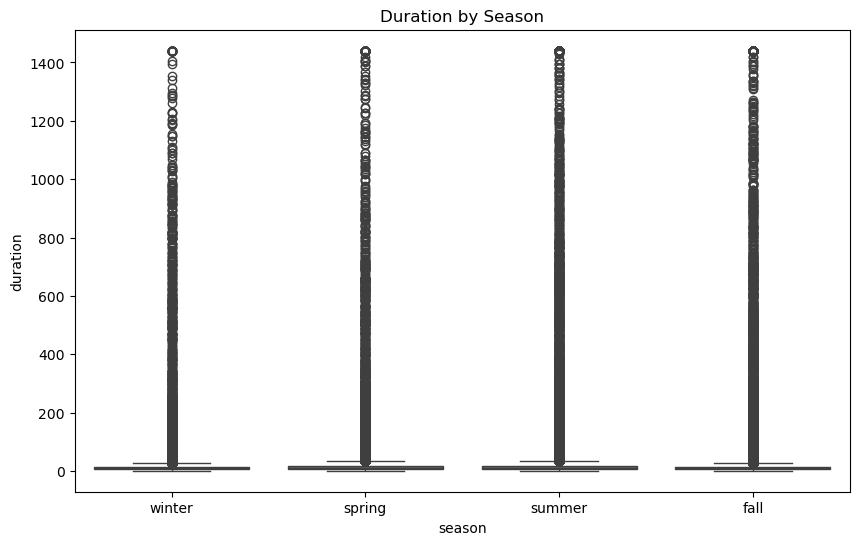

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Duration by rider type
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='duration', data=df)
plt.title('Duration by Season')
plt.show()

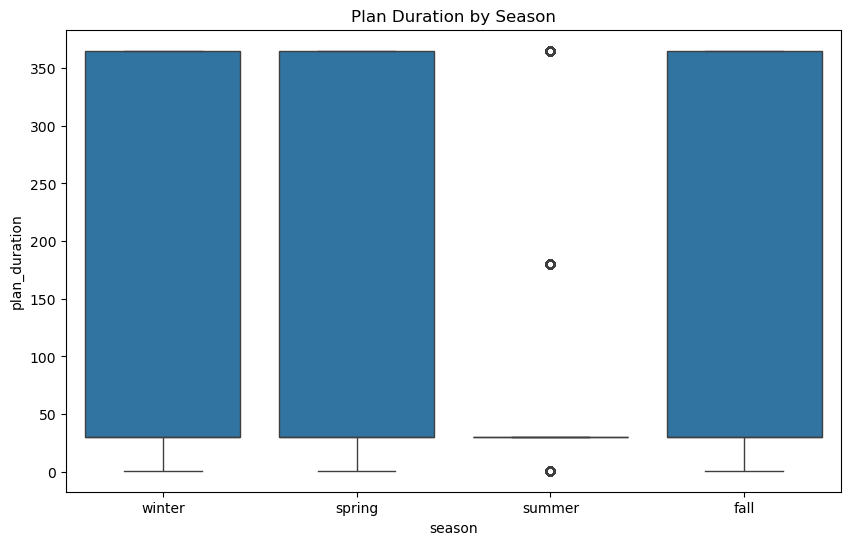

In [13]:
# Plan Duration by rider type
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='plan_duration', data=df)
plt.title('Plan Duration by Season')
plt.show()

In [14]:
df['plan_duration'].value_counts()

plan_duration
30     714195
365    302491
1       67082
180       779
Name: count, dtype: int64

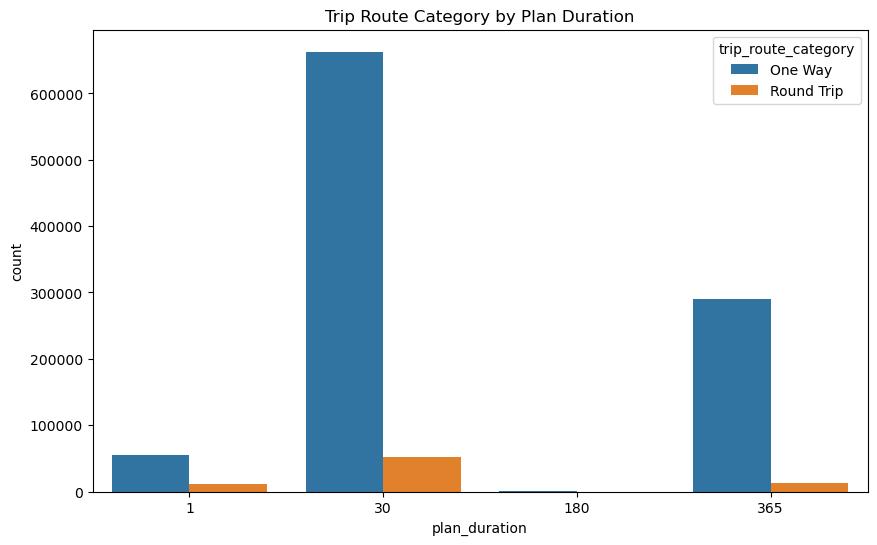

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='plan_duration', hue='trip_route_category', data=df)
plt.title('Trip Route Category by Plan Duration')
plt.savefig('Trip Route Category by Plan Duration.png')
plt.show()

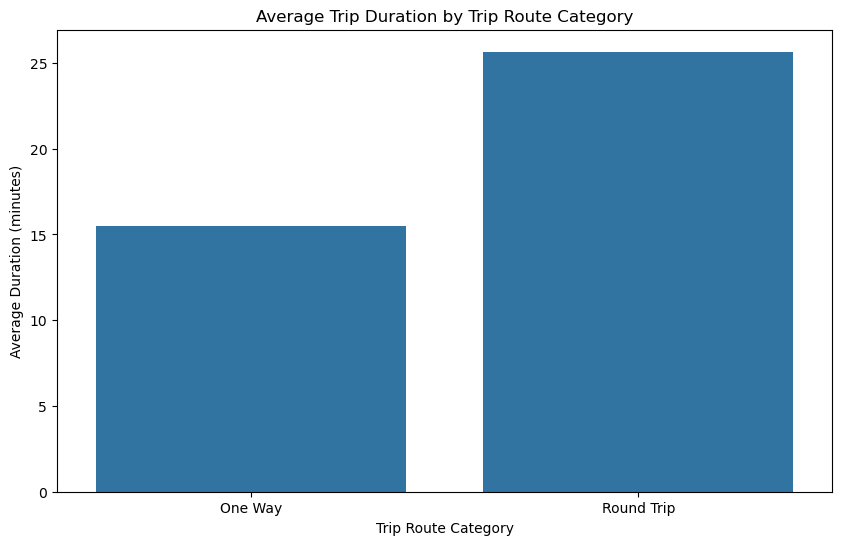

In [16]:
# Calculate the average duration for each trip route category
avg_duration = df.groupby('trip_route_category')['duration'].mean().reset_index()

# Plot the average duration
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_route_category', y='duration', data=avg_duration)
plt.title('Average Trip Duration by Trip Route Category')
plt.xlabel('Trip Route Category')
plt.ylabel('Average Duration (minutes)')
plt.show()

In [17]:
df['trip_route_category'].value_counts()

trip_route_category
One Way       1008622
Round Trip      75925
Name: count, dtype: int64

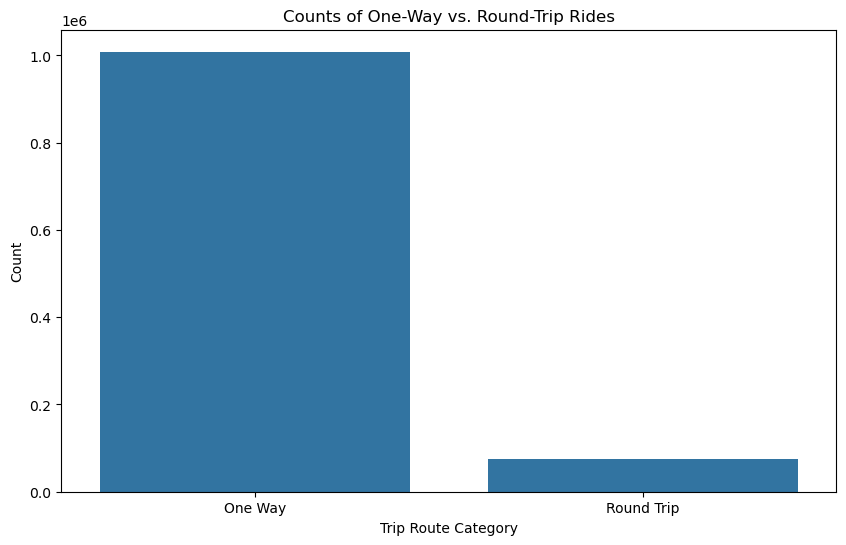

In [18]:
# Calculate counts and average duration for each trip route category
trip_route_summary = df.groupby('trip_route_category')['duration'].agg(['count', 'mean']).reset_index()

# Plotting the counts of one-way vs. round-trip rides
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_route_category', y='count', data=trip_route_summary)
plt.title('Counts of One-Way vs. Round-Trip Rides')
plt.xlabel('Trip Route Category')
plt.ylabel('Count')
plt.show()

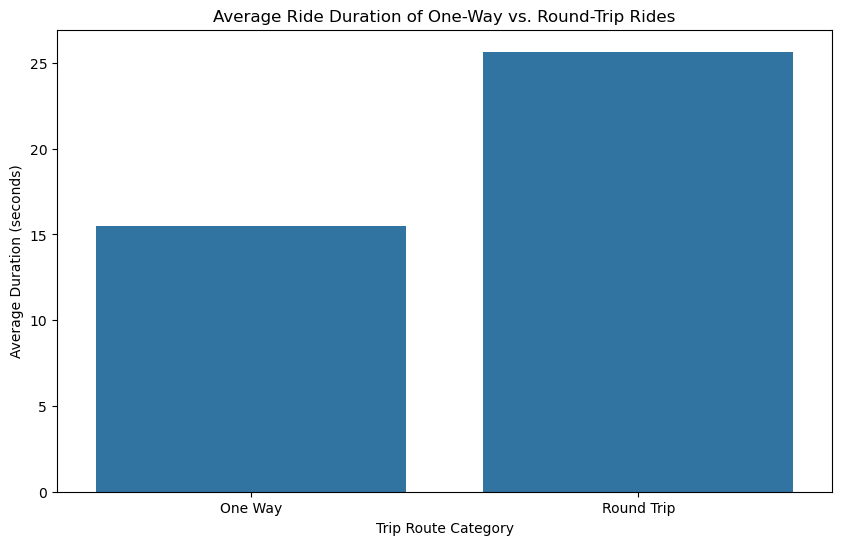

In [19]:
# Plotting the average ride length for each trip route category
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_route_category', y='mean', data=trip_route_summary)
plt.title('Average Ride Duration of One-Way vs. Round-Trip Rides')
plt.xlabel('Trip Route Category')
plt.ylabel('Average Duration (seconds)')
plt.show()

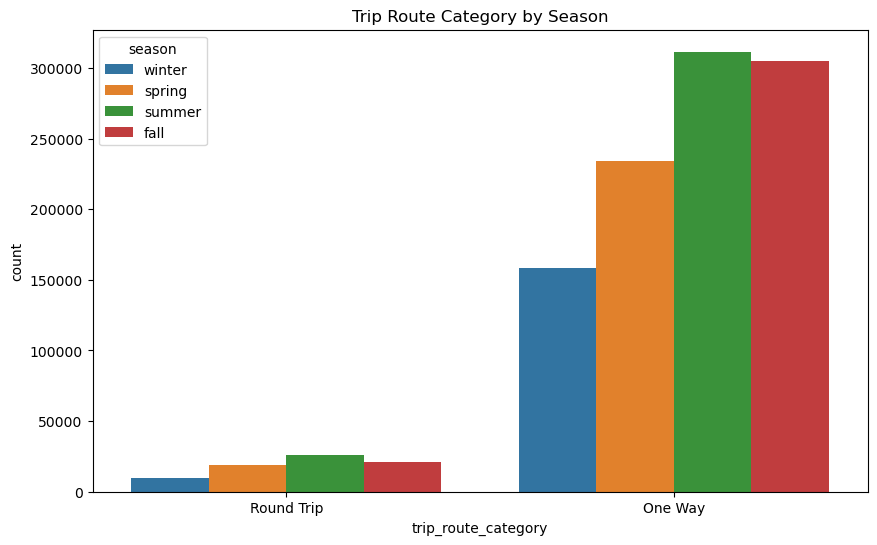

In [20]:
# Count plots for start_station, end_station, etc.
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_route_category', hue='season', data=df)
plt.title('Trip Route Category by Season')
plt.savefig('Trip Route Category by Season.png')
plt.show()

# Repeat similar count plots for passholder_type, bike_type, etc.


In [21]:
from scipy.stats import chi2_contingency

# Example: Chi-square test for 'trip_route_category' by 'rider_type'
contingency_table = pd.crosstab(df['season'], df['trip_route_category'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test p-value for 'trip_route_category' by 'rider_type': {p}")


Chi-square test p-value for 'trip_route_category' by 'rider_type': 7.523055192789525e-216


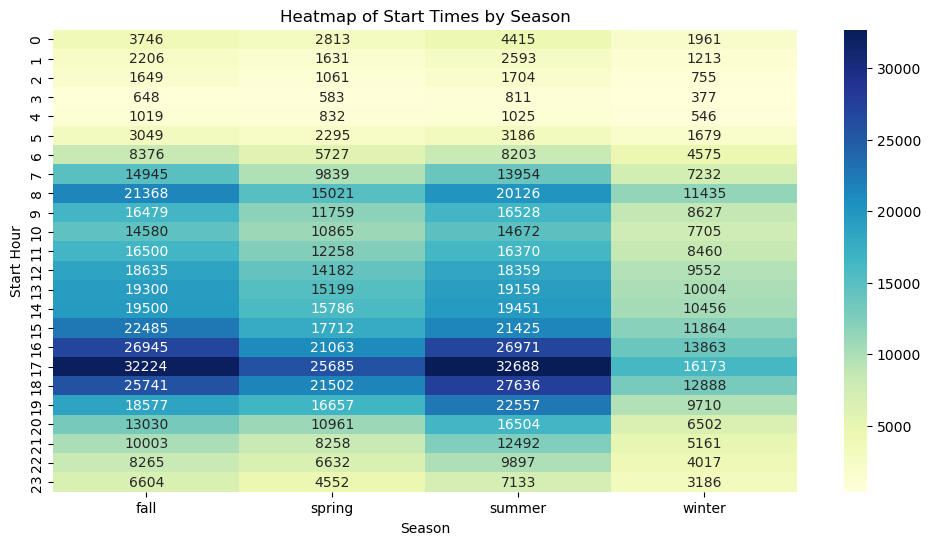

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour from 'start_time' and 'end_time' for better granularity
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour
df['end_hour'] = pd.to_datetime(df['end_time']).dt.hour

# Heatmap of start time by rider type
plt.figure(figsize=(12, 6))
start_time_pivot = df.pivot_table(index='start_hour', columns='season', values='trip_id', aggfunc='count')
sns.heatmap(start_time_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Start Times by Season")
plt.xlabel("Season")
plt.ylabel("Start Hour")
plt.show()


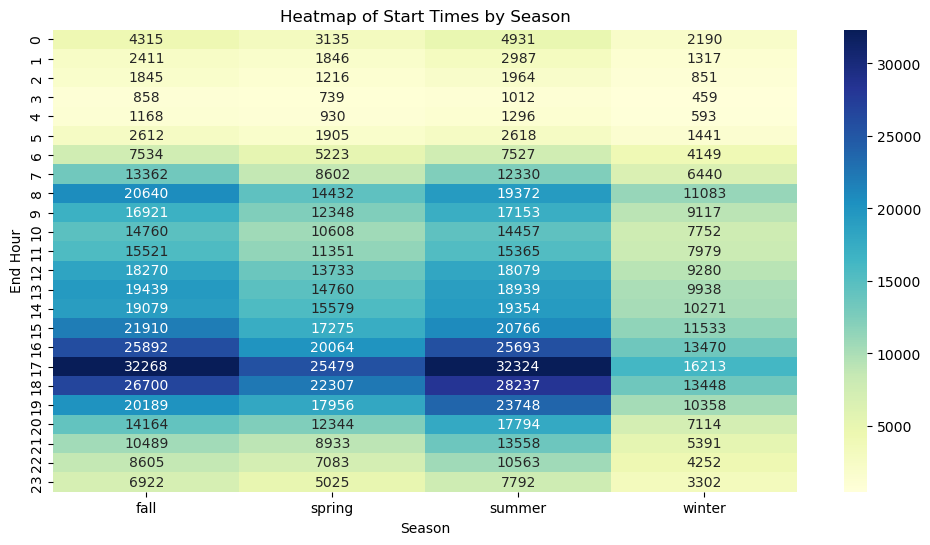

In [23]:
# Heatmap of start time by rider type
plt.figure(figsize=(12, 6))
start_time_pivot = df.pivot_table(index='end_hour', columns='season', values='trip_id', aggfunc='count')
sns.heatmap(start_time_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Start Times by Season")
plt.xlabel("Season")
plt.ylabel("End Hour")
plt.savefig('Heatmap of Start Times by Season.png')
plt.show()

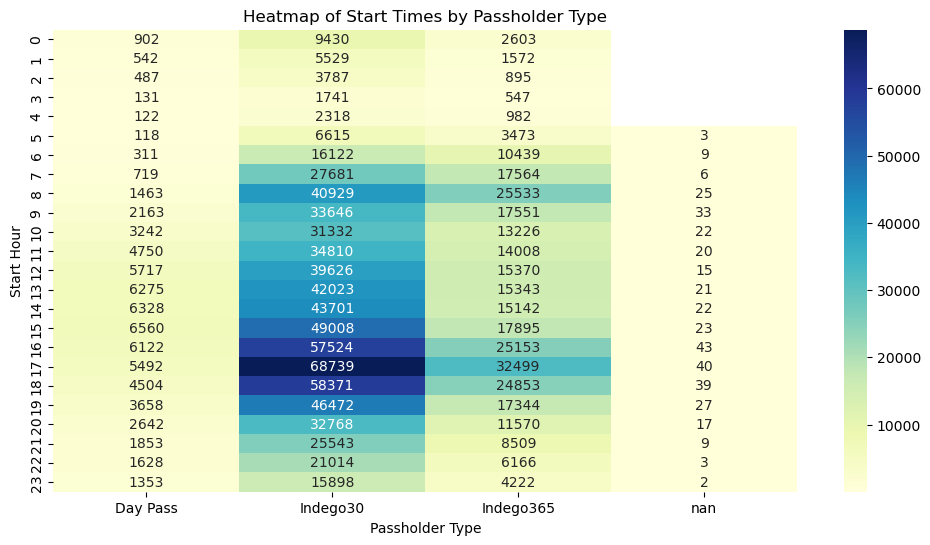

In [24]:
# Heatmap of start time by rider type
plt.figure(figsize=(12, 6))
start_time_pivot = df.pivot_table(index='start_hour', columns='passholder_type', values='trip_id', aggfunc='count')
sns.heatmap(start_time_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Start Times by Passholder Type")
plt.xlabel("Passholder Type")
plt.ylabel("Start Hour")
plt.savefig('Heatmap of Start Times by Passholder Type.png')
plt.show()

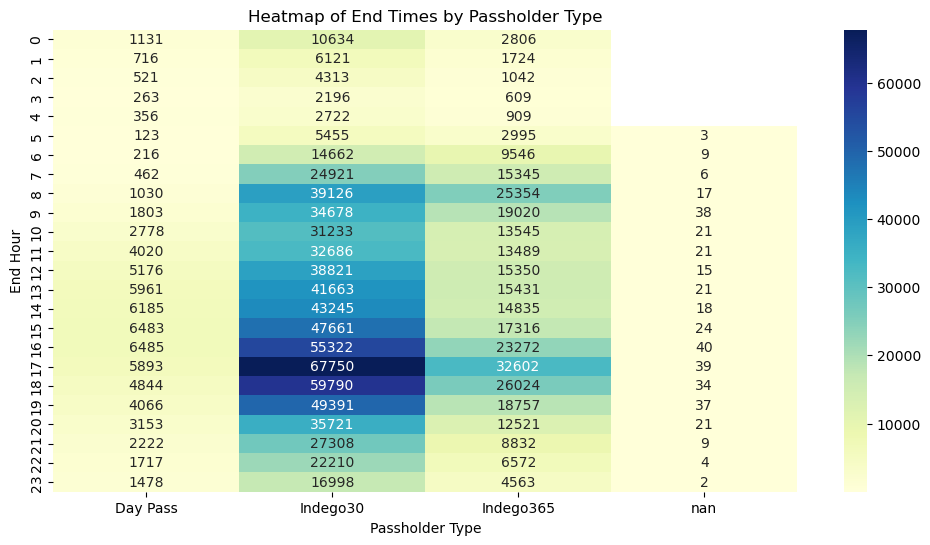

In [25]:
# Heatmap of start time by rider type
plt.figure(figsize=(12, 6))
start_time_pivot = df.pivot_table(index='end_hour', columns='passholder_type', values='trip_id', aggfunc='count')
sns.heatmap(start_time_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of End Times by Passholder Type")
plt.xlabel("Passholder Type")
plt.ylabel("End Hour")
plt.show()

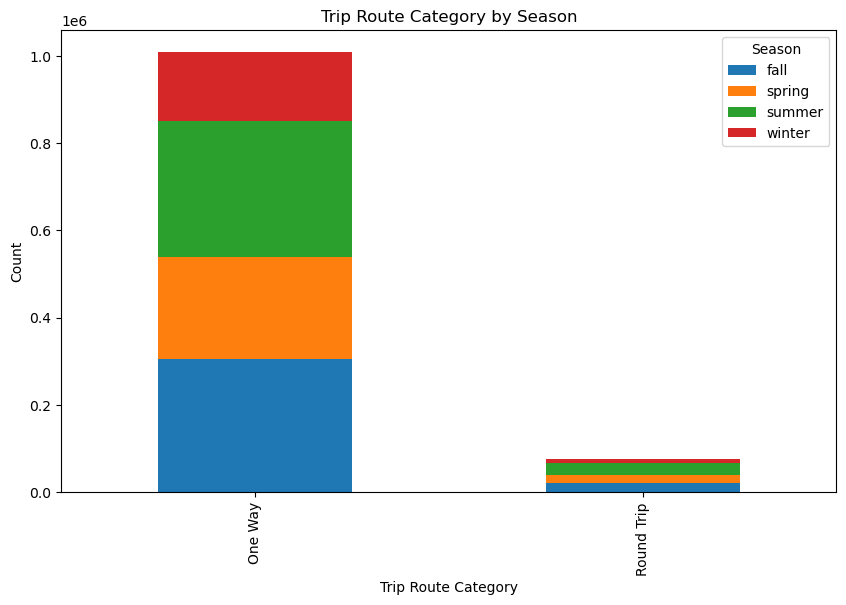

In [26]:
# Stacked bar for 'trip_route_category' by 'rider_type'
trip_route_counts = df.groupby(['trip_route_category', 'season']).size().unstack()
trip_route_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Trip Route Category by Season")
plt.xlabel("Trip Route Category")
plt.ylabel("Count")
plt.legend(title="Season")
plt.show()


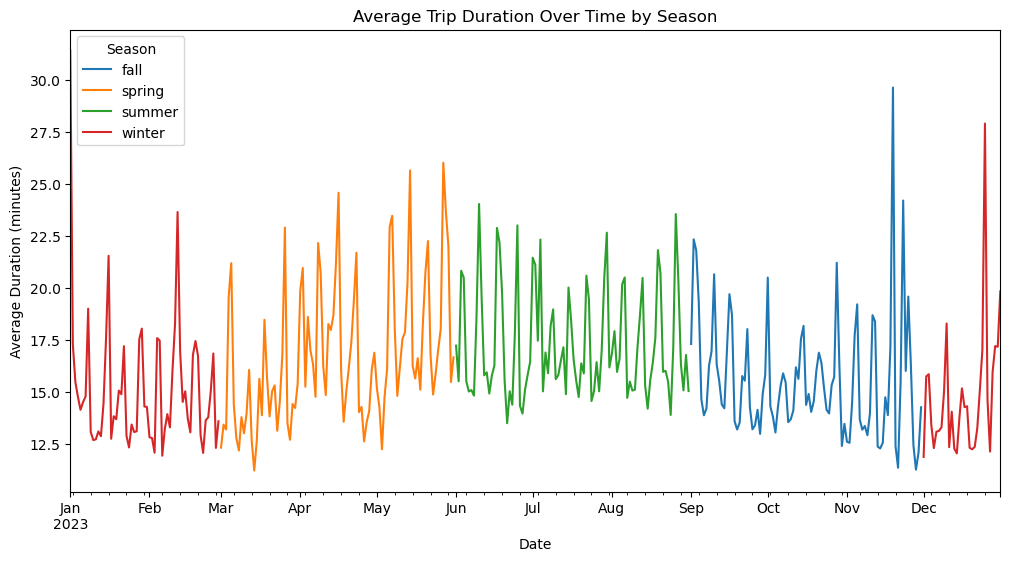

In [61]:
# Convert start_date to datetime if not already done
df['start_date'] = pd.to_datetime(df['start_date'])

# Calculate average duration by rider_type and date
duration_by_date = df.groupby(['start_date', 'season'])['duration'].mean().unstack()

# Plot
duration_by_date.plot(figsize=(12, 6))
plt.title("Average Trip Duration Over Time by Season")
plt.xlabel("Date")
plt.ylabel("Average Duration (minutes)")
plt.legend(title="Season")
plt.savefig("Average Trip Duration Over Time by Season.png"
plt.show()


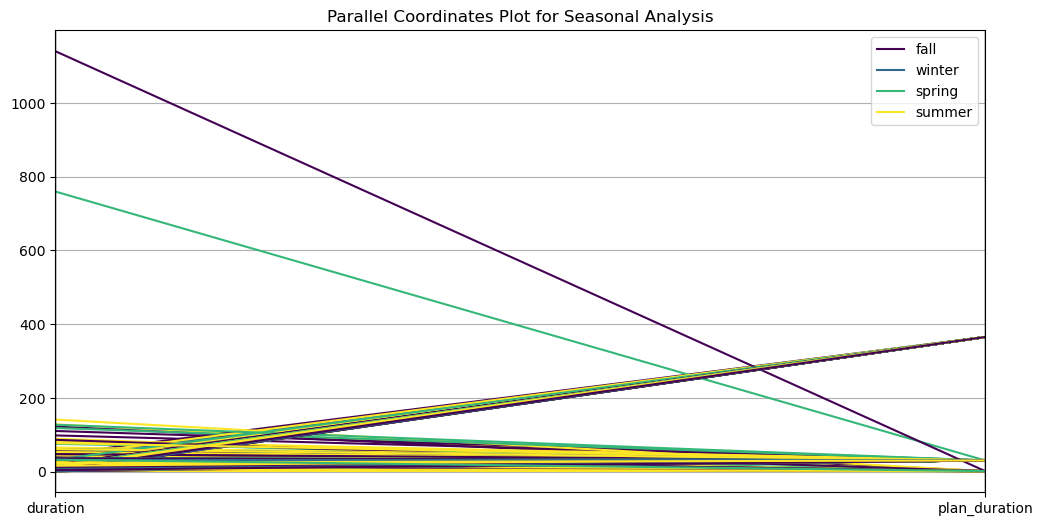

In [28]:
from pandas.plotting import parallel_coordinates

# Select relevant columns and filter for a manageable number of rows
parallel_data = df[['season', 'duration', 'plan_duration']].sample(1000)
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, 'season', colormap='viridis')
plt.title("Parallel Coordinates Plot for Seasonal Analysis")
plt.show()
